<a href="https://colab.research.google.com/github/Jorge2018/prediccion_ventas/blob/main/prediccion_ventas04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns
df=pd.read_csv(r'https://raw.githubusercontent.com/Jorge2018/prediccion_ventas/main/sales_predictons.csv')
print('---------------------------')
print('la cantidad de filas y columnas del df son (fil,col):', df.shape)
print('---------------------------')
print('los tipos de dato del df son:\n', df.dtypes)
print('---------------------------')
print('La cantidad de registros al comenzar es:\n',df.count())
print('---------------------------')

---------------------------
la cantidad de filas y columnas del df son (fil,col): (8523, 12)
---------------------------
los tipos de dato del df son:
 Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object
---------------------------
La cantidad de registros al comenzar es:
 Item_Identifier              8523
Item_Weight                  7060
Item_Fat_Content             8523
Item_Visibility              8523
Item_Type                    8523
Item_MRP                     8523
Outlet_Identifier            8523
Outlet_Establishment_Year    8523
Outlet_Size                  6113
Outlet_Locatio

In [ ]:
df.duplicated()
df = df.drop_duplicates()
print('la cantidad de registros sin duplicados es:\n',df.count())
print('---------------------------')
print('los datos faltantes del df son:\n',df.isna().sum())
print('---------------------------')

la cantidad de registros sin duplicados es:
 Item_Identifier              8523
Item_Weight                  7060
Item_Fat_Content             8523
Item_Visibility              8523
Item_Type                    8523
Item_MRP                     8523
Outlet_Identifier            8523
Outlet_Establishment_Year    8523
Outlet_Size                  6113
Outlet_Location_Type         8523
Outlet_Type                  8523
Item_Outlet_Sales            8523
dtype: int64
---------------------------
los datos faltantes del df son:
 Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64
---------------------------


In [ ]:
#Se otorga el siguiente tratamiento a los campos nan
#Se resuelve conservarlos y reemplazar por valores 'neutros', facilmente identificables
#'Item_Weight'=0 and 'Outlet_Size'='Desc'
df['Item_Weight'].fillna(0, inplace=True)
df['Outlet_Size'].fillna('Desc', inplace=True)
print('los datos faltantes del df, despues del reemplazo son:\n',df.isna().sum())

los datos faltantes del df, despues del reemplazo son:
 Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [ ]:
#categorizacion de la columna Item_Fat_Content
print('---------------------------')
df['Item_Fat_Content01']=np.where(df.Item_Fat_Content=='LF', 'Low Fat',
                         np.where(df.Item_Fat_Content=='low fat', 'Low Fat',
                         np.where(df.Item_Fat_Content=='reg', 'Regular',df['Item_Fat_Content'])))
del df['Item_Fat_Content']
df = df.rename(columns={'Item_Fat_Content01': 'Item_Fat_Content'})
df['Item_Fat_Content'].unique()

---------------------------


array(['Low Fat', 'Regular'], dtype=object)

In [ ]:


#Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales 
print('el minimo valor de la columna Item_Weight es:',df['Item_Weight'].min(),' el maximo valor de la columna Item_Weight es:',df['Item_Weight'].max(),' la mediana de la columna Item_Weight es:',df['Item_Weight'].mean())
print('el minimo valor de la columna Item_Visibility es:',df['Item_Visibility'].min(),' el maximo valor de la columna Item_Visibility es:',df['Item_Visibility'].max(),' la mediana de la columna Item_Visibility es:',df['Item_Visibility'].mean())
print('el minimo valor de la columna Item_MRP es:',df['Item_MRP'].min(),' el maximo valor de la columna Item_MRP es:',df['Item_MRP'].max(),' la mediana de la columna Item_MRP es:',df['Item_MRP'].mean())
print('el minimo valor de la columna Outlet_Establishment_Year es:',df['Outlet_Establishment_Year'].min(),' el maximo valor de la columna Outlet_Establishment_Year es:',df['Outlet_Establishment_Year'].max(),' la mediana de la columna Outlet_Establishment_Year es:',df['Outlet_Establishment_Year'].mean())
print('el minimo valor de la columna Item_Outlet_Sales es:',df['Item_Outlet_Sales'].min(),' el maximo valor de la columna Item_Outlet_Sales es:',df['Item_Outlet_Sales'].max(),' la mediana de la columna Item_Outlet_Sales es:',df['Item_Outlet_Sales'].mean())

el minimo valor de la columna Item_Weight es: 0.0  el maximo valor de la columna Item_Weight es: 21.35  la mediana de la columna Item_Weight es: 10.650589581133403
el minimo valor de la columna Item_Visibility es: 0.0  el maximo valor de la columna Item_Visibility es: 0.328390948  la mediana de la columna Item_Visibility es: 0.06613202877895108
el minimo valor de la columna Item_MRP es: 31.29  el maximo valor de la columna Item_MRP es: 266.8884  la mediana de la columna Item_MRP es: 140.9927819781767
el minimo valor de la columna Outlet_Establishment_Year es: 1985  el maximo valor de la columna Outlet_Establishment_Year es: 2009  la mediana de la columna Outlet_Establishment_Year es: 1997.8318667135984
el minimo valor de la columna Item_Outlet_Sales es: 33.29  el maximo valor de la columna Item_Outlet_Sales es: 13086.9648  la mediana de la columna Item_Outlet_Sales es: 2181.288913575032


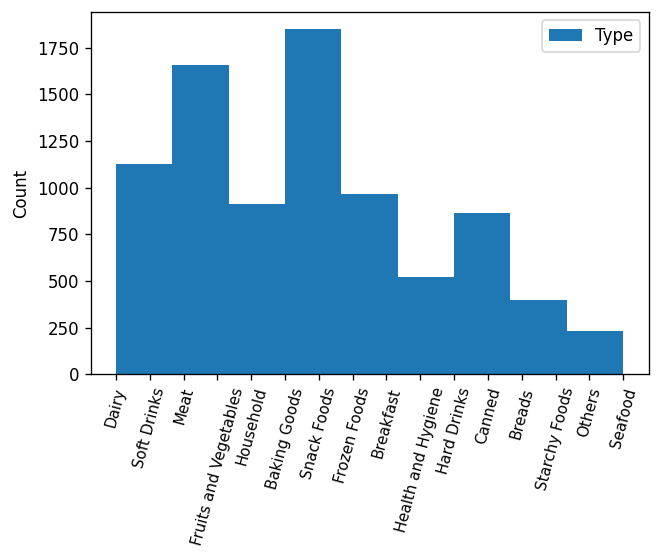

distribucion de los distintos tipos de item analizados


In [ ]:
x =df['Item_Type'] 
num_bins = 9
etiqueta=['Type']
fig1 = plt.figure(dpi=120)
ax1 = fig1.add_subplot(1,1,1)
ax1.hist(x, num_bins, density=False)
ax1.set_ylabel("Count")
ax1.legend(etiqueta)
plt.xticks(rotation=75,fontsize=9)
plt.show()
print('distribucion de los distintos tipos de item analizados')

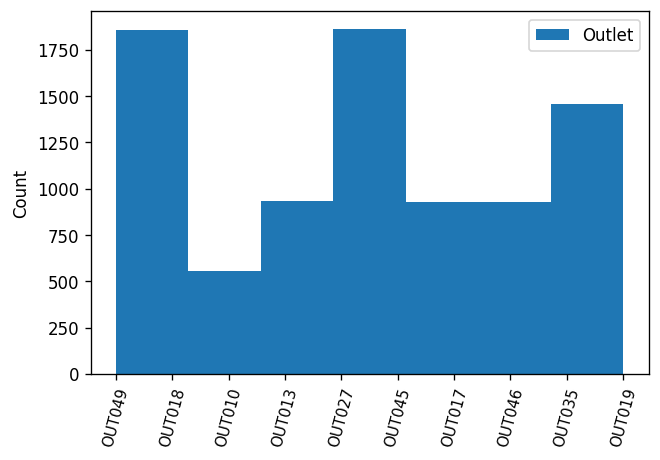

distribucion de los distintos identificadores de Outlets analizados


In [ ]:
x =df['Outlet_Identifier']
num_bins = 7
etiqueta=['Outlet']
fig1 = plt.figure(dpi=120)
ax1 = fig1.add_subplot(1,1,1)
ax1.hist(x, num_bins, density=False)
ax1.set_ylabel("Count")
ax1.legend(etiqueta)
plt.xticks(rotation=75,fontsize=9)
plt.show()
print('distribucion de los distintos identificadores de Outlets analizados')

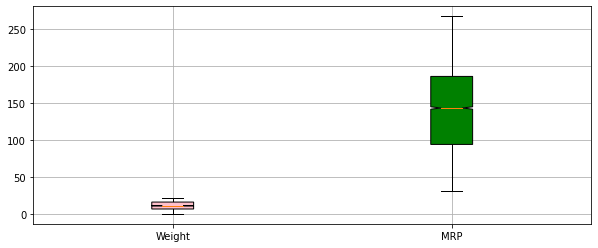

resumen estadistico entre el peso (Weight) y el MRP


In [ ]:
data = df['Item_Weight'],df['Item_MRP']
labels = ['Weight','MRP']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
bplot = axes.boxplot(data,
                         notch=True,
                         vert=True,
                         patch_artist=True,
                         labels=labels)

colors = ['pink', 'green']
for bplotA in (bplot,bplot):
    for patch, color in zip(bplotA['boxes'], colors):
        patch.set_facecolor(color)
plt.grid()
plt.show()
print('resumen estadistico entre el peso (Weight) y el MRP')

Mapa de calor con la corelacion entre las columnas Outlet_Size y Outlet_Establishment_Year



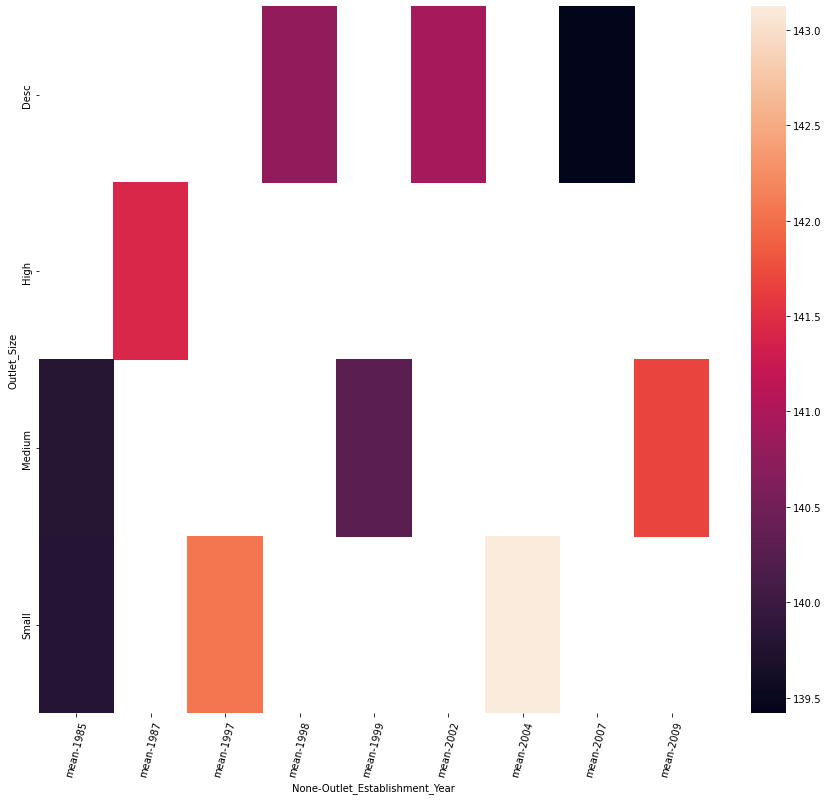

In [ ]:
pivot=pd.pivot_table(df,values='Item_MRP',index='Outlet_Size',columns='Outlet_Establishment_Year', aggfunc=[np.mean])
figura=plt.figure(figsize=(15,13))
plt.xticks(rotation=75,fontsize=10)
ax = sns.heatmap(pivot);
print('Mapa de calor con la corelacion entre las columnas Outlet_Size y Outlet_Establishment_Year\n')

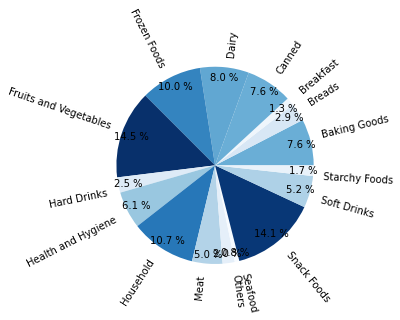

<Figure size 1656x1656 with 0 Axes>

In [168]:
from matplotlib import cm
from matplotlib import colors
df1=df.groupby(['Item_Type']).count() # Agrupa y cuenta todo el df por la col 'Item_Type'
df2=df1['Item_Identifier'].to_dict()  # convierte a dicc los valores de la col 'Item_Identifier'
etiquetas=list(df2.keys())            # convierte en lista las keys del dicc recien creado
valores=list(df2.values())            # convierte en lista los valores del dicc recien creado


normdata = colors.Normalize(min(valores), max(valores)) # variable que utiliza la libreria Normalize (selecciona min y max de la lista valores)
colormap = cm.get_cmap("Blues")                         # variable que utiliza la libreria LinearSegmentedColormap
colores =colormap(normdata(valores))                    # variable del tipo arreglo que usa ambas variables recien creadas (normdata y colormap)

plt.pie(valores, labels=etiquetas, autopct="%0.1f %%", colors=colores,textprops={'fontsize': 10},rotatelabels =True,pctdistance=0.9)
#se identifican los siguientes valores
#valores -> lista con valores del tipo int tomadas del df principal ([Item_type].count)
#labels=etiquetas -> lista con valores del tipo str tomadas del df principal ([Item_Identifier])
#autopct="%0.1f %%"-> cantidad de decimales a utilizar
#colors=colores -> colores a utilizar
#textprops={'fontsize': 10} -> tamaño de la fuente a utilizar en los labels
#rotatelabels =True -> propiedad que se activa (True) para cambiar la direccion del texto del label
#pctdistance=0.9 -> propiedad ajustable que permite "acercar" o "alejar" los num o porcentajes mostrados del centro del grafo

plt.axis("equal") #asegura proporcion igualitaria, vale decir, suma de porcentajes 100% (círculo)
plt.figure(figsize=(23,23)) #tamaño del grafo
plt.show() #muestra el grafico recien creado